<a href="https://colab.research.google.com/github/vennelakantekar/CodSoft_TITANIC_SURVIVAL_PREDICTION/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
ship = pd.read_csv('tested.csv')
ship

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
ship.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [17]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: >

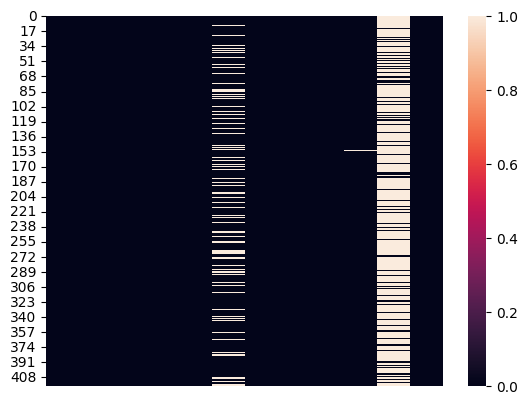

In [28]:
sns.heatmap(df.isnull(), xticklabels=False)

In [30]:
print(ship.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


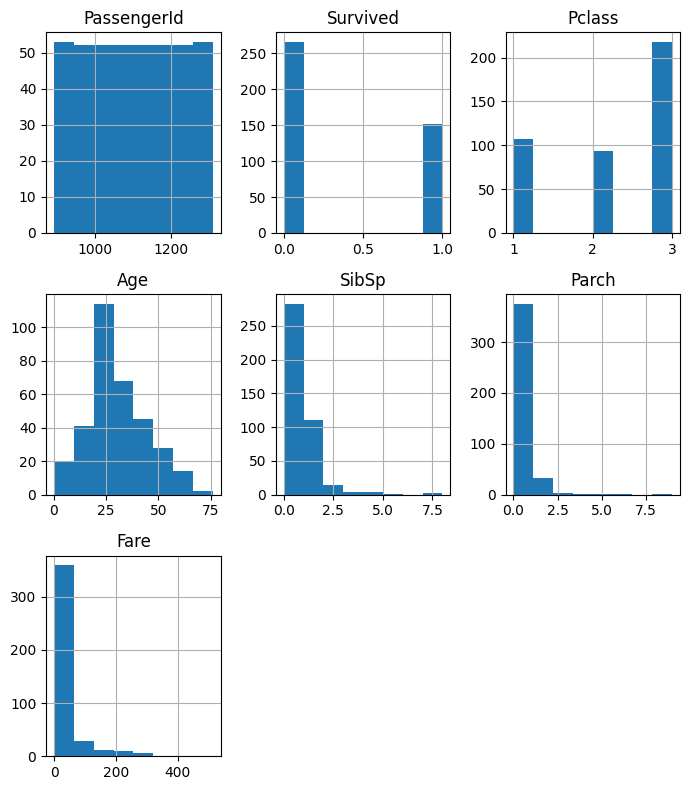

In [35]:
ship.hist(bins=8, figsize=(7, 8))
plt.tight_layout()
plt.show()

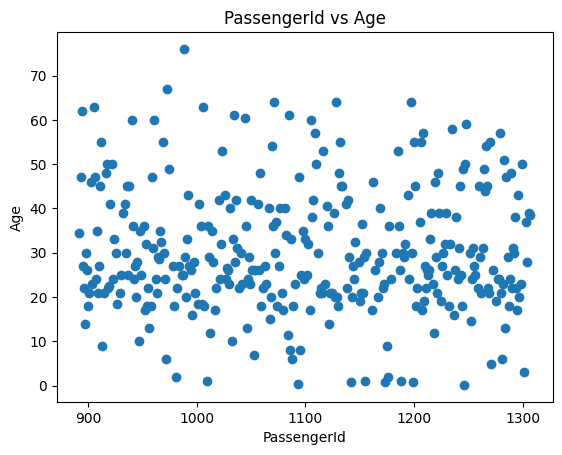

In [38]:
plt.scatter(df['PassengerId'], df['Age'])
plt.xlabel('PassengerId')
plt.ylabel('Age')
plt.title('PassengerId vs Age')
plt.show()

In [40]:
survival_counts = ship['Survived'].value_counts()

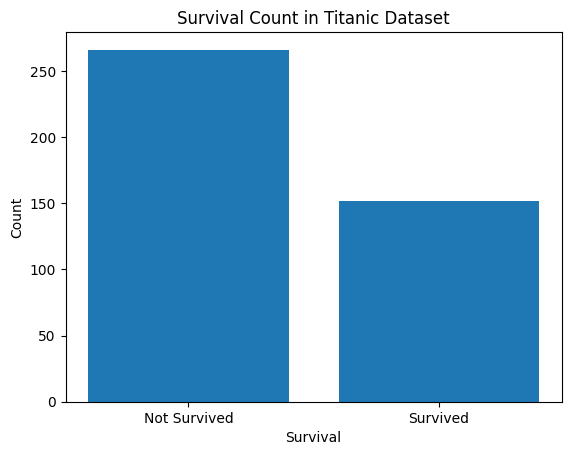

In [41]:
labels = ['Not Survived', 'Survived']
values = survival_counts.values
plt.bar(labels, values)
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Count in Titanic Dataset')
plt.show()

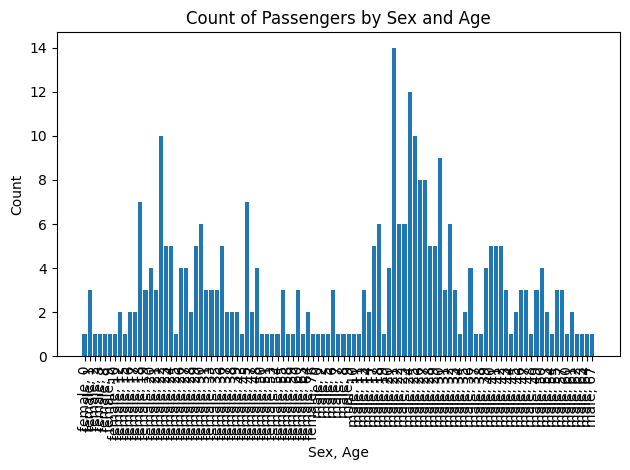

In [43]:
sex_age_counts = df.groupby(['Sex', 'Age']).size().reset_index(name='Count')
labels = sex_age_counts['Sex'].astype(str) + ', ' + sex_age_counts['Age'].astype(int).astype(str)
values = sex_age_counts['Count']
plt.bar(labels, values)
plt.xlabel('Sex, Age')
plt.ylabel('Count')
plt.title('Count of Passengers by Sex and Age')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
ship['Sex'] = ship['Sex'].map({'male': 0, 'female': 1})

<Axes: xlabel='count', ylabel='Survived'>

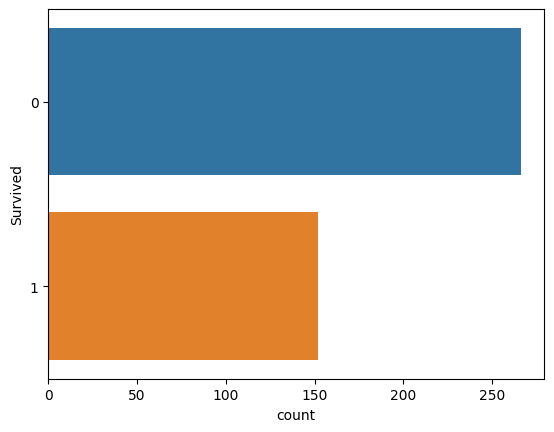

In [52]:
sns.countplot(y="Survived", data= ship)

<Axes: xlabel='Age', ylabel='count'>

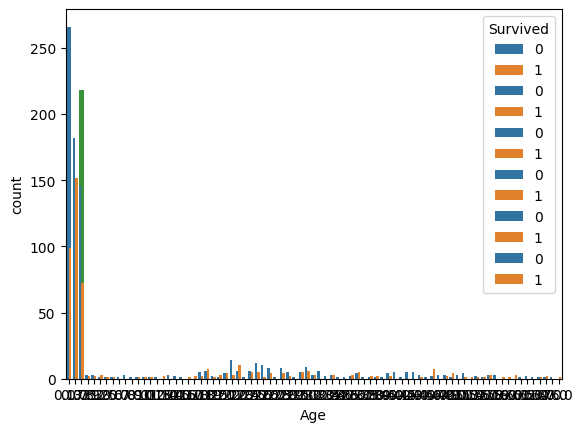

In [53]:
sns.countplot(x="Sex", data=ship)

# number of Survivers Gender wise
sns.countplot(x="Sex", hue="Survived" ,data=ship)

# making a count plot for "Pclass" columns
sns.countplot(x="Pclass", data=ship)

sns.countplot(x="Pclass", hue="Survived" ,data=ship)

sns.countplot(x="Embarked", hue="Survived" ,data=ship)

sns.countplot(x="Parch", hue="Survived" ,data=ship)

sns.countplot(x="SibSp", hue="Survived" ,data=ship)

sns.countplot(x="Age", hue="Survived" ,data=ship)